<a href="https://colab.research.google.com/github/Dieljr/pythonDev/blob/master/SGDRegressor_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conteúdo para aulas online
## Segundo Notebook: Stochastic Gradient Descent Regressor

### O Objetivo desse notebook é o de apresentar recursos intermediários a avançados sobre o Algoritmo Stochastic Gradient Descent Regressor do SKLearn, da classe dos modelos linearers (Linear Model).

## PRÁTICA:

In [ ]:
# Carregar pacotes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split


In [ ]:
# Carregar dataset
df = pd.read_csv('mpg.csv', sep = ';', names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'accelaration',
                                              'model_year', 'origin', 'car_name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   accelaration  406 non-null    float64
 6   model_year    406 non-null    float64
 7   origin        1 non-null      object 
 8   car_name      0 non-null      float64
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


### Pequenos ajustes

In [ ]:
# Não precisaremos das duas últimas colunas
del df['origin']
del df['car_name']

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,accelaration,model_year
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 405
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   accelaration  392 non-null    float64
 6   model_year    392 non-null    float64
dtypes: float64(7)
memory usage: 24.5 KB


In [ ]:
# Separar as variáveis para o algoritmo
X = df.drop(['mpg'], axis = 1)
y = df['mpg']

In [ ]:
# Normalizar o conjunto das features, pois o algoritmo exige para dados não normalizados
scale = StandardScaler()
X_scale = scale.fit_transform(X)

In [ ]:
# Dividir em dados treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X_scale, y, test_size = 0.3, random_state = 100)

### Avaliação com diferentes configurações dos hiperparametros
#### Neste ponto você deve tentar as mais diversas combinações para ganhar conhecimento do compportamento dos resultados.
#### Vou apresentar apenas alguns o rsto e com você!

### modelo 0: nada é alterado

In [ ]:
# Criar objeto SGDRegressor, apenas alterando verbose para acompanharmos as info geradas pelo algoritmo.
sgdr_0 = SGDRegressor(verbose = 1)

In [ ]:
model_0 = sgdr_0.fit(X_treino, y_treino)

-- Epoch 1
Norm: 3.39, NNZs: 6, Bias: 14.052905, T: 274, Avg. loss: 124.894984
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.62, NNZs: 6, Bias: 18.410311, T: 548, Avg. loss: 33.432152
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.74, NNZs: 6, Bias: 20.563835, T: 822, Avg. loss: 15.256785
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.85, NNZs: 6, Bias: 21.741901, T: 1096, Avg. loss: 9.842208
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.96, NNZs: 6, Bias: 22.409371, T: 1370, Avg. loss: 7.977276
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.12, NNZs: 6, Bias: 22.830591, T: 1644, Avg. loss: 7.237640
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.21, NNZs: 6, Bias: 23.086967, T: 1918, Avg. loss: 6.920975
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 4.26, NNZs: 6, Bias: 23.247513, T: 2192, Avg. loss: 6.784896
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 4.23, NNZs: 6, Bias: 23.357367, T: 2466, Avg. loss: 6.723853
Total training ti

In [ ]:
# Avalia o quão bom/mal foi o aprendizado
model_0.score(X_scale, y)*100

80.37779710712428

### compreendendo as atributos

#### Menor taxa de perda na epóca 48, com 6.26

In [ ]:
# Momento em que x = 0 e intercepta o eixo y
model_0.intercept_

array([23.57591999])

In [ ]:
# Coeficiente estimado (coef_)
# Quanto maior melhor o ajuste da reta
# Aqui há um coeficiente para cada variável, visto que se trata de uma regressão multivariada

model_0.coef_

array([-0.14350425, -0.05369341, -1.11455769, -4.46451301,  0.06945963,
        2.68713686])

### modelo 1: alteração na norma de regularização (L2 para L1)

In [ ]:
sgdr_1 = SGDRegressor(penalty='L1', verbose = 1)

In [ ]:
model_1 = sgdr_1.fit(X_treino, y_treino)

-- Epoch 1
Norm: 3.35, NNZs: 6, Bias: 13.849661, T: 274, Avg. loss: 128.373660
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.85, NNZs: 6, Bias: 18.317544, T: 548, Avg. loss: 34.424500
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.03, NNZs: 6, Bias: 20.515303, T: 822, Avg. loss: 15.483971
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 4.04, NNZs: 6, Bias: 21.722275, T: 1096, Avg. loss: 9.951865
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.05, NNZs: 6, Bias: 22.419617, T: 1370, Avg. loss: 8.008410
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.08, NNZs: 6, Bias: 22.829957, T: 1644, Avg. loss: 7.277846
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.12, NNZs: 6, Bias: 23.091403, T: 1918, Avg. loss: 6.960748
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 4.10, NNZs: 6, Bias: 23.246335, T: 2192, Avg. loss: 6.794790
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 4.21, NNZs: 6, Bias: 23.353025, T: 2466, Avg. loss: 6.727993
Total training ti

In [ ]:
# Avalia o quão bom/mal foi o aprendizado
model_1.score(X_scale, y)*100

80.46404653366756

#### Menor taxa de perda na epóca 72, com 6,21

### modelo 2: alteração na norma de regularização (eta0 de 0.01 para 0.1)

In [ ]:
sgdr_2 = SGDRegressor(eta0 = 0.1, verbose = 1)

In [ ]:
model_2 = sgdr_2.fit(X_treino, y_treino)

-- Epoch 1
Norm: 4.81, NNZs: 6, Bias: 23.960117, T: 274, Avg. loss: 19.844464
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 4.94, NNZs: 6, Bias: 23.008176, T: 548, Avg. loss: 7.153614
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 5.37, NNZs: 6, Bias: 23.811600, T: 822, Avg. loss: 6.926079
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.44, NNZs: 6, Bias: 23.428805, T: 1096, Avg. loss: 6.688776
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 5.73, NNZs: 6, Bias: 23.332962, T: 1370, Avg. loss: 6.576115
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 5.75, NNZs: 6, Bias: 23.119769, T: 1644, Avg. loss: 6.562462
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 6.05, NNZs: 6, Bias: 23.306260, T: 1918, Avg. loss: 6.723376
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 6.41, NNZs: 6, Bias: 23.342551, T: 2192, Avg. loss: 6.671885
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 6.30, NNZs: 6, Bias: 23.431840, T: 2466, Avg. loss: 6.657573
Total training time:

In [ ]:
# Avalia o quão bom/mal foi o aprendizado
model_2.score(X_scale, y)*100

80.33303275383406

#### Menor taxa de perda na epóca 18, com 6,55.
#### Houve uma na rodada pois o algoritmo rodou menos epócas para aprender.

### modelo 3: alteração na norma de regularização (alpha de 0.0001 para 0.001)

In [ ]:
sgdr_3 = SGDRegressor(alpha = 0.001, verbose = 1)

In [ ]:
model_3 = sgdr_3.fit(X_treino, y_treino)

-- Epoch 1
Norm: 3.94, NNZs: 6, Bias: 13.892241, T: 274, Avg. loss: 126.019546
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.47, NNZs: 6, Bias: 18.308945, T: 548, Avg. loss: 34.426353
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.80, NNZs: 6, Bias: 20.485937, T: 822, Avg. loss: 15.783648
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.83, NNZs: 6, Bias: 21.701859, T: 1096, Avg. loss: 10.119514
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.91, NNZs: 6, Bias: 22.381081, T: 1370, Avg. loss: 8.145314
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 3.93, NNZs: 6, Bias: 22.790855, T: 1644, Avg. loss: 7.384256
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.03, NNZs: 6, Bias: 23.064679, T: 1918, Avg. loss: 7.062928
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 4.09, NNZs: 6, Bias: 23.224583, T: 2192, Avg. loss: 6.881085
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 4.15, NNZs: 6, Bias: 23.339873, T: 2466, Avg. loss: 6.795131
Total training t

In [ ]:
# Avalia o quão bom/mal foi o aprendizado
model_3.score(X_scale, y)*100

80.56727986339902

#### Menor taxa de perda na epóca 54, com 6,24.

### Vamos unificar o melhor dos três modelos

In [ ]:
sgdr_4 = SGDRegressor(penalty = 'L1', eta0 = 0.01,  alpha = 0.001, verbose = 1)

In [ ]:
model_4 = sgdr_4.fit(X_treino, y_treino)

-- Epoch 1
Norm: 3.73, NNZs: 6, Bias: 13.988723, T: 274, Avg. loss: 125.219036
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.71, NNZs: 6, Bias: 18.381857, T: 548, Avg. loss: 34.022353
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.61, NNZs: 6, Bias: 20.526727, T: 822, Avg. loss: 15.358980
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.87, NNZs: 6, Bias: 21.709819, T: 1096, Avg. loss: 9.941667
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.08, NNZs: 6, Bias: 22.370885, T: 1370, Avg. loss: 7.977441
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.12, NNZs: 6, Bias: 22.814590, T: 1644, Avg. loss: 7.277411
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 4.14, NNZs: 6, Bias: 23.058534, T: 1918, Avg. loss: 6.939579
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 4.17, NNZs: 6, Bias: 23.225699, T: 2192, Avg. loss: 6.787192
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 4.24, NNZs: 6, Bias: 23.331635, T: 2466, Avg. loss: 6.705018
Total training ti

In [ ]:
# Avalia o quão bom/mal foi o aprendizado
model_4.score(X_scale, y)*100

80.42735070646734

### Menor taxa de perda na epóca 83, com 6,19.
### E uma boa taxa de acurácia: 80.58% a segunda melhor dentre os modelos.
### Obtivemos uma taxa menor de perda, mesmo com aumento dos ciclos. Para datasets medianos, esse seja o melhor caminho a seguir e continuar testando novos valores de hiperparametros. Caso o dataset seja extremente grande, talvez devemos abrir mão para ciclos menores para poder rodar na máquina local. Ou a saída seria trabalhar com hadoop/spark.

### Predição

In [ ]:
pred_sgdr_4 = sgdr_4.predict(X_teste)
df_comp = pd.DataFrame(data = list(zip(pred_sgdr_4, y)), columns = ['predição_mpg', 'historico_mpg']); df_comp

,predição_mpg,historico_mpg
0,21.715365,18.0
1,28.701652,15.0
2,31.337227,18.0
3,25.612773,16.0
4,26.379970,17.0
...,...,...
113,29.602051,26.0
114,20.210026,15.0
115,17.425938,16.0
116,25.530044,29.0


<Figure size 1080x864 with 0 Axes>

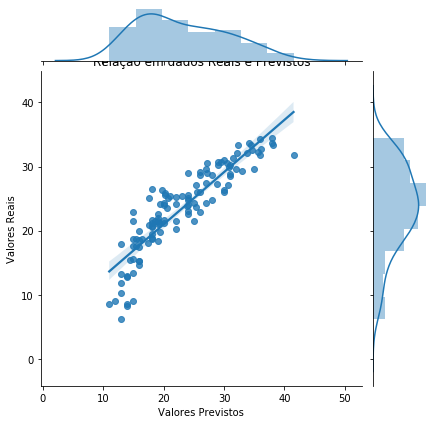

In [ ]:
# Plotar massa de dados
plt.figure(figsize = (15,12))
sb.jointplot(y_teste, pred_sgdr_4, kind = 'reg')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Relação em dados Reais e Previstos')
plt.show()

### O gráfico acima mostra uma forte reta de regressão, o que é bom!
## Com certeza, podemos melhorar, principalmente com a limpeza dos outliers, mas esse não era o tema desse momento!